*Este conjunto de datos contiene 13 características clínico-patológicas destinadas a predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló durante 15 años y cada paciente fue seguido durante al menos 10 años.*
# CONTENIDO:
**• Edad:** La edad del paciente en el momento del diagnóstico o tratamiento.

**• Género:** El sexo del paciente (masculino o femenino).

**• Tabaquismo:** Si el paciente es fumador o no.

**• Tabaquismo Hx:** Historial de tabaquismo del paciente (p. ej., si alguna vez ha fumado).

**• Radioterapia Hx:** Historial de tratamiento con radioterapia para cualquier condición.

**• Función tiroidea:** El estado de la función tiroidea, que posiblemente indique si hay alguna anomalía.

**• Examen físico:** Hallazgos de un examen físico del paciente, que puede incluir palpación de la glándula tiroides y las estructuras circundantes.

**• Adenopatía:** Presencia o ausencia de ganglios linfáticos agrandados (adenopatía) en la región del cuello.

**• Patología:** Tipos específicos de cáncer de tiroides según lo determinado por el examen patológico de muestras de biopsia.

**• Focalidad:** Si el cáncer es unifocal (limitado a una ubicación) o multifocal (presente en múltiples ubicaciones).

**• Riesgo:** La categoría de riesgo del cáncer basada en varios factores, como el tamaño del tumor, el grado de diseminación y el tipo histológico.

**• T:** Clasificación del tumor según su tamaño y extensión de la invasión a estructuras cercanas.

**• N:** Clasificación ganglionar que indica la afectación de los ganglios linfáticos.

**• M:** Clasificación de metástasis que indica la presencia o ausencia de metástasis a distancia.

**• Estadio:** El estadio general del cáncer, generalmente determinado combinando las clasificaciones T, N y M.

**• Respuesta:** Respuesta al tratamiento, que indica si el cáncer respondió positiva, negativamente o permaneció estable después del tratamiento.

**• Recurrente:** Indica si el cáncer ha recurrido después del tratamiento inicial.

***LINK: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io

In [11]:
uploaded = files.upload()
df = pd.read_csv("tiroides.csv")

Saving tiroides.csv to tiroides.csv


In [12]:
df.head(11)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [13]:
print(df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [14]:
gen_rep = {
    "F": 0,  # Mujer
    "M": 1   # Hombre
}

smok_rep = {
    "No": 1,
    "Yes": 0
}

HxSmok_rep = {
    "No": 1,
    "Yes": 0
}

HxRad_rep = {
    "No": 1,
    "Yes": 0
}

ThyroidFunc_rep = {
    "Euthyroid": 0,
    "Clinical Hyperthyroidism": 1,
    "Subclinical Hyperthyroidism": 2,
    "Subclinical Hypothyroidism": 3,
    "Clinical Hypothyroidism": 4
}

PhysicalExam_rep = {
    "Multinodular goiter": 0,
    "Single nodular goiter-right": 1,
    "Single nodular goiter-left": 2,
    "Normal": 3,
    "Diffuse goiter": 4
}

Adenopathy_rep = {
    "No": 0,
    "Right": 1,
    "Bilateral": 2,
    "Left": 3,
    "Extensive": 4
}

Pathology_rep = {
    "Papillary": 0,
    "Micropapillary": 1,
    "Follicular": 2,
    "Hurthel cell": 3
}

Focality_rep = {
    "Uni-Focal": 0,
    "Multi-Focal": 1
}

Risk_rep = {
    "Low": 0,
    "Intermediate": 1,
    "High": 2
}

T_rep = {
    "T1a": 0,
    "T1b": 1,
    "T2": 2,
    "T3a": 3,
    "T4a": 4,
    "T4b": 5
}

N_rep = {
    "N0": 0,
    "N1a": 1,
    "N1b": 2
}

M_rep = {
    "M0": 0,
    "M1": 1
}

Stage_rep = {
    "I": 0,
    "II": 1,
    "III": 2,
    "IVA": 3,
    "IVB": 4
}

Response_rep = {
    "Excellent": 0,
    "Structural Incomplete": 1,
    "Indeterminate": 2,
    "Biochemical Incomplete": 3
}

Recurred_rep = {
    "No": 1,
    "Yes": 0
}

In [16]:
rep_d = {
    "Gender": gen_rep,
    "Smoking": smok_rep,
    "Hx Smoking": HxSmok_rep,
    "Hx Radiothreapy": HxRad_rep,
    "Thyroid Function": ThyroidFunc_rep,
    "Physical Examination": PhysicalExam_rep,
    "Adenopathy": Adenopathy_rep,
    "Pathology": Pathology_rep,
    "Focality": Focality_rep,
    "Risk": Risk_rep,
    "T": T_rep,
    "N": N_rep,
    "M": M_rep,
    "Stage": Stage_rep,
    "Response": Response_rep,
    "Recurred": Recurred_rep
}

In [17]:
# Reemplaza los valores
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
print("\nDataFrame despues de reemplazos:")
df.head()


DataFrame despues de reemplazos:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,1,1,1,0,2,0,1,0,0,0,0,0,0,2,1
1,34,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,30,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
3,62,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,62,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1


In [18]:
# Convierte a numérico y maneja errores
df["Gender"] = pd.to_numeric(df["Gender"], errors="coerce")
df["Smoking"] = pd.to_numeric(df["Smoking"], errors="coerce")
df["Hx Smoking"] = pd.to_numeric(df["Hx Smoking"], errors="coerce")
df["Hx Radiothreapy"] = pd.to_numeric(df["Hx Radiothreapy"], errors="coerce")
df["Thyroid Function"] = pd.to_numeric(df["Thyroid Function"], errors="coerce")
df["Physical Examination"] = pd.to_numeric(df["Physical Examination"], errors="coerce")
df["Adenopathy"] = pd.to_numeric(df["Adenopathy"], errors="coerce")
df["Pathology"] = pd.to_numeric(df["Pathology"], errors="coerce")
df["Focality"] = pd.to_numeric(df["Focality"], errors="coerce")
df["Risk"] = pd.to_numeric(df["Risk"], errors="coerce")
df["T"] = pd.to_numeric(df["T"], errors="coerce")
df["N"] = pd.to_numeric(df["N"], errors="coerce")
df["M"] = pd.to_numeric(df["M"], errors="coerce")
df["Stage"] = pd.to_numeric(df["Stage"], errors="coerce")
df["Response"] = pd.to_numeric(df["Response"], errors="coerce")
df["Recurred"] = pd.to_numeric(df["Recurred"], errors="coerce")

In [19]:
# Normaliza
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Normalización
print("\nDataFrame normalizado:")
df_n.describe()


DataFrame normalizado:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.810000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.670000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02
mean,-5.565609e-17,-1.484162e-16,-9.276015e-17,1.159502e-16,-1.669683e-16,4.638007e-17,0.000000,-3.729883e-17,6.957011e-18,-1.484162e-16,1.484162e-16,-1.548867e-16,-7.420812e-17,5.565609e-17,7.420812e-17,0.000000,1.113122e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.709132e+00,-4.764136e-01,-2.607399e+00,-3.556047e+00,-7.319429e+00,-3.421106e-01,-1.048040,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-1.780508e+00,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,-1.593627e+00
25%,-7.840923e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,-1.048040,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-4.788220e-01,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,-1.593627e+00
50%,-2.554985e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,0.045691,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-4.492651e-02,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,6.258609e-01
75%,6.695407e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,1.139423,5.231834e-01,8.544062e-02,1.345895e+00,8.808305e-01,8.228644e-01,5.327059e-01,-2.217799e-01,-3.140154e-01,0.281867,6.258609e-01
max,2.717842e+00,2.093536e+00,3.825226e-01,2.804769e-01,1.362660e-01,4.025501e+00,3.326886,3.670545e+00,3.060328e+00,1.345895e+00,2.435476e+00,2.558446e+00,1.698571e+00,4.497203e+00,4.858797e+00,2.419587,6.258609e-01


In [20]:
df.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,381.000000,383.000000,383.000000,383.000000,367.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.872063,0.926893,0.981723,0.313316,0.958225,0.501312,0.428198,0.355091,0.433420,2.051771,0.543081,0.046997,0.242820,0.736292,0.718016
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.915832,0.914301,0.953179,0.840368,0.479167,0.643233,1.152351,0.857732,0.211910,0.773274,0.935576,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.500000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.000000,2.000000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [21]:
# Calcula y muestra la matriz de correlacion
corr_matrix = df_n.corr()
print("\nMatriz de correlacion:")
df_n.corr()


Matriz de correlacion:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.186457,-0.309536,-0.134531,-0.176588,0.027759,-0.075319,0.080452,0.170184,0.223847,0.295556,0.208384,0.061243,0.235401,0.526862,0.210680,-0.258897
Gender,0.186457,1.000000,-0.621886,-0.175755,-0.235865,0.027581,-0.051757,0.257792,0.036809,0.207634,0.295229,0.256371,0.238766,0.211540,0.250215,0.149018,-0.328189
Smoking,-0.309536,-0.621886,1.000000,0.252773,0.297874,-0.005534,-0.000402,-0.242439,-0.214388,-0.238494,-0.374324,-0.344129,-0.204305,-0.321233,-0.426152,-0.166665,0.333243
Hx Smoking,-0.134531,-0.175755,0.252773,1.000000,0.261198,-0.101187,0.075028,-0.084143,-0.119635,-0.001204,-0.138403,-0.093453,-0.044421,-0.127209,-0.262371,-0.068529,0.136073
Hx Radiothreapy,-0.176588,-0.235865,0.297874,0.261198,1.000000,0.004118,0.015104,-0.194856,-0.092961,-0.102415,-0.272056,-0.201452,-0.095535,-0.430214,-0.461901,-0.059371,0.174407
Thyroid Function,0.027759,0.027581,-0.005534,-0.101187,0.004118,1.000000,0.028178,-0.012504,0.059919,0.032147,0.004397,-0.060594,-0.023893,-0.022117,0.032757,-0.001085,0.049726
Physical Examination,-0.075319,-0.051757,-0.000402,0.075028,0.015104,0.028178,1.000000,-0.048276,0.132368,-0.258842,-0.178339,-0.145699,-0.151250,0.050694,-0.089289,-0.077179,0.111134
Adenopathy,0.080452,0.257792,-0.242439,-0.084143,-0.194856,-0.012504,-0.048276,1.000000,-0.115467,0.328117,0.603629,0.415977,0.775531,0.233402,0.276248,0.202043,-0.583665
Pathology,0.170184,0.036809,-0.214388,-0.119635,-0.092961,0.059919,0.132368,-0.115467,1.000000,0.069983,0.009294,-0.020436,-0.225405,0.033699,0.077255,0.040781,0.029352
Focality,0.223847,0.207634,-0.238494,-0.001204,-0.102415,0.032147,-0.258842,0.328117,0.069983,1.000000,0.450615,0.424517,0.376692,0.221931,0.331892,0.215266,-0.383776


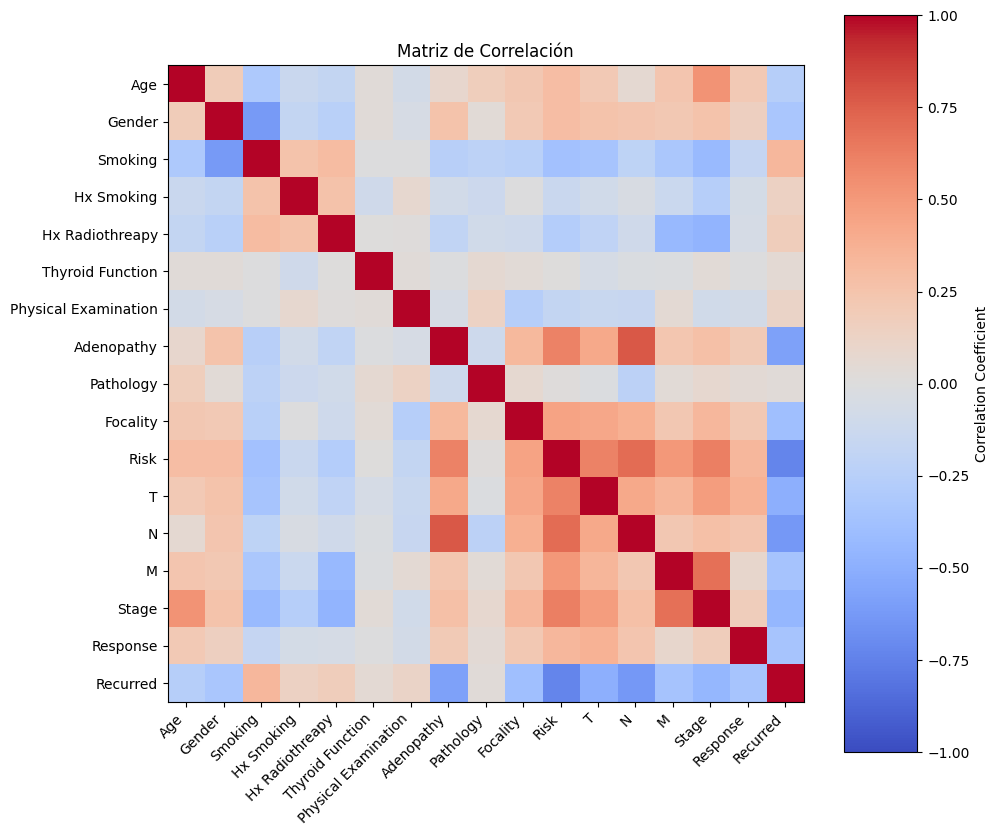

In [22]:
# Visualiza la matriz de correlacion
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlacion
cax = ax.imshow(corr_matrix.to_numpy(), cmap='coolwarm', vmin=-1, vmax=1)

# Ajusta
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# Añade una barra de color
cbar = fig.colorbar(cax, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Correlation Coefficient')

# Añade título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
plt.tight_layout()

plt.show()

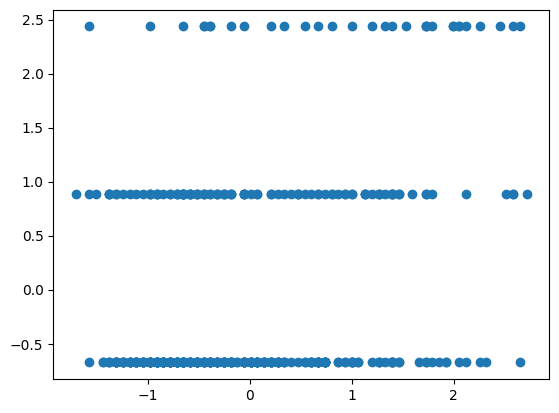

In [23]:
xs, ys, zs = df_n[['Age', 'Smoking', 'Risk']].to_numpy().T
plt.plot(xs, zs, marker='o', lw=0)

In [85]:
X = df.iloc[:, 1:].values

Y = df.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

In [86]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(5)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(8, 16)
w_output = np.random.rand(1, 8)

b_hidden = np.random.rand(8, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 - np.exp(-x))

print(b_hidden)
print(b_output)
print(w_hidden)
print(w_output)

# Función forward propagation
def forward_prop(X):
  Z1 = w_hidden @ X + b_hidden
  print(f"{Z1}")
  A1 = relu(Z1)
  print(f"{A1}")
  Z2 = w_output @ A1 + b_output
  print(f"{Z2}")
  A2 = logistic(Z2)
  print(f"{A2}")
  return Z1, A1, Z2, A2

287
[[0.08507046]
 [0.80777744]
 [0.17025008]
 [0.19534463]
 [0.81464201]
 [0.81028553]
 [0.58937388]
 [0.91473434]]
[[0.05982164]]
[[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
  0.76590786 0.51841799 0.2968005  0.18772123 0.08074127 0.7384403
  0.44130922 0.15830987 0.87993703 0.27408646]
 [0.41423502 0.29607993 0.62878791 0.57983781 0.5999292  0.26581912
  0.28468588 0.25358821 0.32756395 0.1441643  0.16561286 0.96393053
  0.96022672 0.18841466 0.02430656 0.20455555]
 [0.69984361 0.77951459 0.02293309 0.57766286 0.00164217 0.51547261
  0.63979518 0.9856244  0.2590976  0.80249689 0.87048309 0.92274961
  0.00221421 0.46948837 0.98146874 0.3989448 ]
 [0.81373248 0.5464565  0.77085409 0.48493107 0.02911156 0.08652569
  0.11145381 0.25124511 0.96491529 0.63176605 0.8166602  0.566082
  0.63535621 0.81190239 0.92668262 0.91262676]
 [0.82481072 0.09420273 0.36104842 0.03550903 0.54635835 0.79614272
  0.0511428  0.18866774 0.36547777 0.24429087 0.79508747 0.35209494
  0

In [87]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
test_predictions = (test_predictions >= 0.5).astype(int) # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

[[ 2.87363728  1.8679627          nan  4.57337639  4.88831976  6.03791313
   3.50598746  3.56612241  4.63351134  2.51670183  5.75097207  3.12844569
   5.29594056  5.53405469  5.63905532  6.78558282  2.8942436   5.14143412
   3.74018956  8.0395229   7.12742994  4.82731946  4.3338312   3.86688599
   3.48538114  2.51670183  5.08209045  3.77444996  8.83041601  7.08392417
   4.93031185  3.48538114  2.51670183  7.82518188  8.68590729  4.65411766
   2.85724833  4.60022352  3.17043778         nan  6.38000065  7.05531758
   4.16528167  5.90226584  6.99174451  1.92237436  5.76041787  6.62170437
   2.51670183  4.93206575  4.41949077  6.70708557  2.51670183  3.04770442
   7.08350369  5.45331343  2.73276106  7.77889045  3.65944829  6.27409017
          nan  4.16528167  2.81350233  6.53689959  5.98451576  5.10441963
   4.88831976  6.91444137  4.27657589  3.82093083  3.05255347  2.84098527
   9.38017934  6.6965117   4.14785948  6.61577044  4.09712501  3.48538114
   3.12844569  7.70065209  3.74018956 

In [88]:
print("PRECISIÓN: ", accuracy)

PRECISIÓN:  0.78125


In [84]:
# Descenso de gradiente estocástico
L = 0.05 # Tasa de aprendizaje

# Función backward propagation
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecución del descenso de gradiente
for i in range(10_000):
  # Selecciona aleatoriamente un conjunto de datos de entrenamiento
  idx = np.random.choice(n, 1, replace=False)
  X_sample = X_train[idx].transpose()
  Y_sample = Y_train[idx]

  # Pasa los datos a través de la red neuronal
  Z1, A1, Z2, A2 = forward_prop(X_sample)

  # Distribuye el error y devuelve pendientes para pesos y sesgos
  dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

  # Actualiza pesos y sesgos
  w_hidden -= L * dW1
  b_hidden -= L * dB1
  w_output -= L * dW2
  b_output -= L * dB2

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]]
[[nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [

KeyboardInterrupt: 

In [68]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
test_predictions = (test_predictions >= 0.5).astype(int) # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions = Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan

TypeError: mean() got an unexpected keyword argument 'test_predictions'

In [69]:
print("PRECISIÓN: ", accuracy)

PRECISIÓN:  0.8958333333333334
